# Retail Insights 360:
### Analyzing Customer Purchase Patterns

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset

df=pd.read_csv("OnlineRetail.csv",encoding='ISO-8859-1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# Checking the information about the dataframe including data types and missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Checking for missing values in each column

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# Dropping rows with missing values

df.dropna(inplace=True)

In [7]:
df.shape

(406829, 8)

In [9]:
df.duplicated().sum()

5225

In [10]:
# Dropping duplicate rows

df.drop_duplicates(inplace=True)

In [11]:
df.shape

(401604, 8)

In [12]:
# Convert 'InvoiceDate' to datetime data type

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [14]:
# Display unique values in the 'Country' column

unique_countries = df['Country'].unique()
print("Unique Countries:")
print(unique_countries)

Unique Countries:
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


# EDA

Total Sales Over Time:

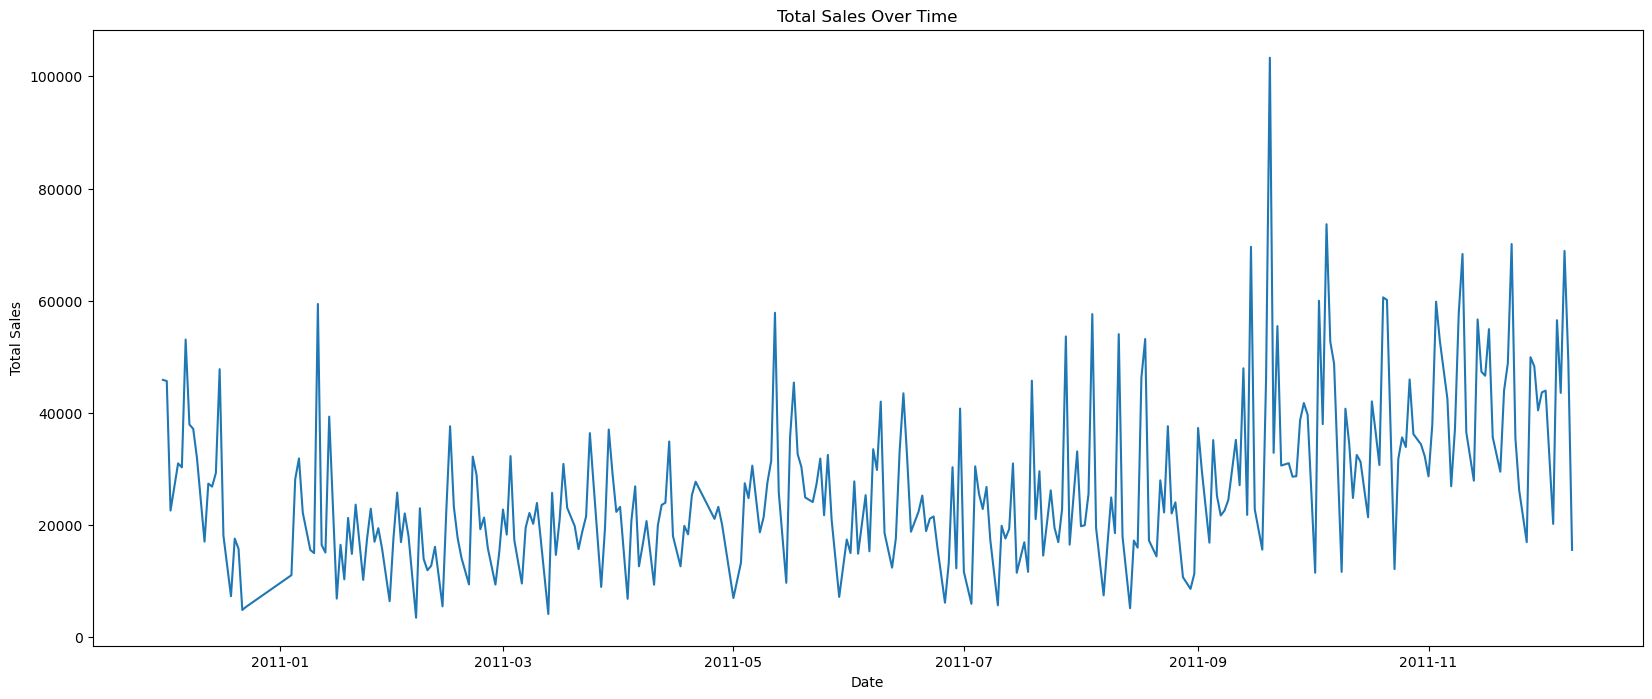

In [26]:
# Calculate total sales for each invoice date
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Group by date and calculate total sales
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalSales'].sum()

# Plot total sales over time
plt.figure(figsize=(20, 8))
daily_sales.plot(title='Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


Top Selling Products:

Top Selling Products:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
JUMBO BAG RED RETROSPOT               44963
ASSORTED COLOUR BIRD ORNAMENT         35215
WHITE HANGING HEART T-LIGHT HOLDER    34128
PACK OF 72 RETROSPOT CAKE CASES       33386
POPCORN HOLDER                        30492
RABBIT NIGHT LIGHT                    27045
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25305
PACK OF 60 PINK PAISLEY CAKE CASES    24129
Name: Quantity, dtype: int64


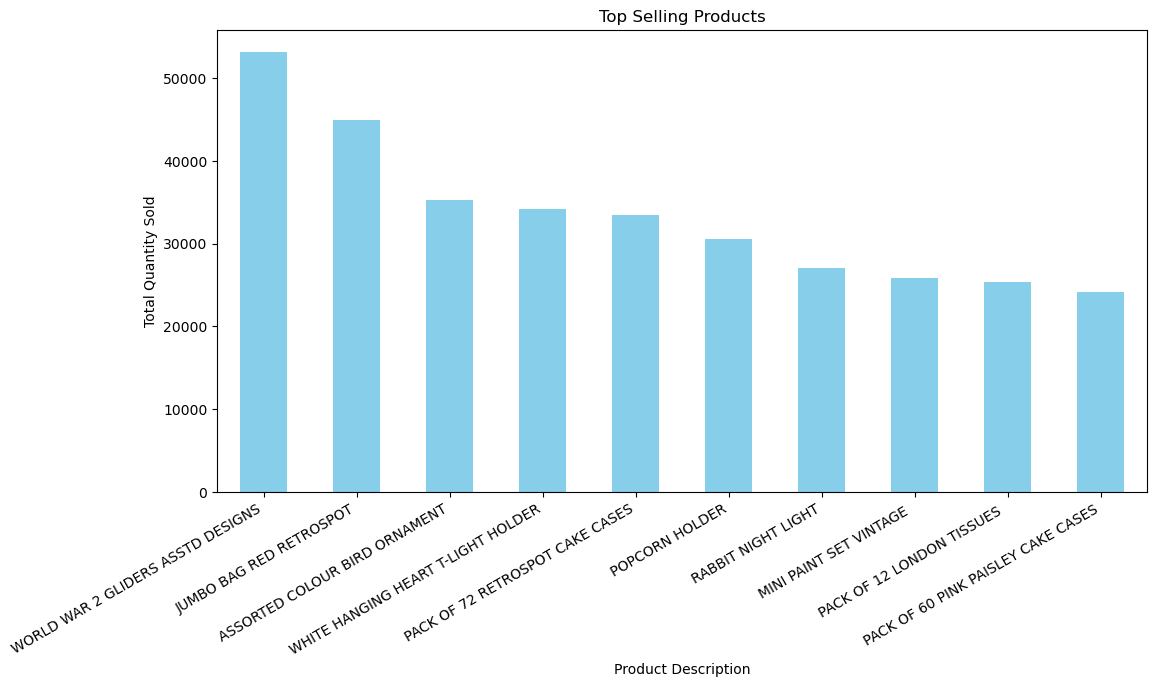

In [24]:
# Identify top-selling products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top Selling Products:")
print(top_products)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=30, ha='right')
plt.show()


Top Customers:

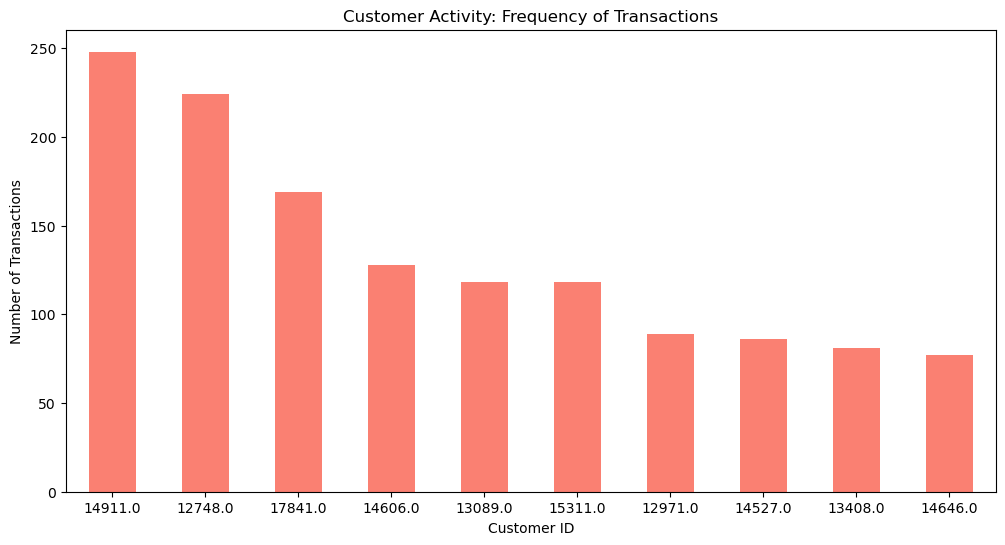

In [28]:
# Calculate the frequency of transactions per customer
customer_activity = df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
customer_activity.head(10).plot(kind='bar', color='salmon')
plt.title('Customer Activity: Frequency of Transactions')
plt.xlabel('Customer ID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()

Geographic Distribution of Customers:

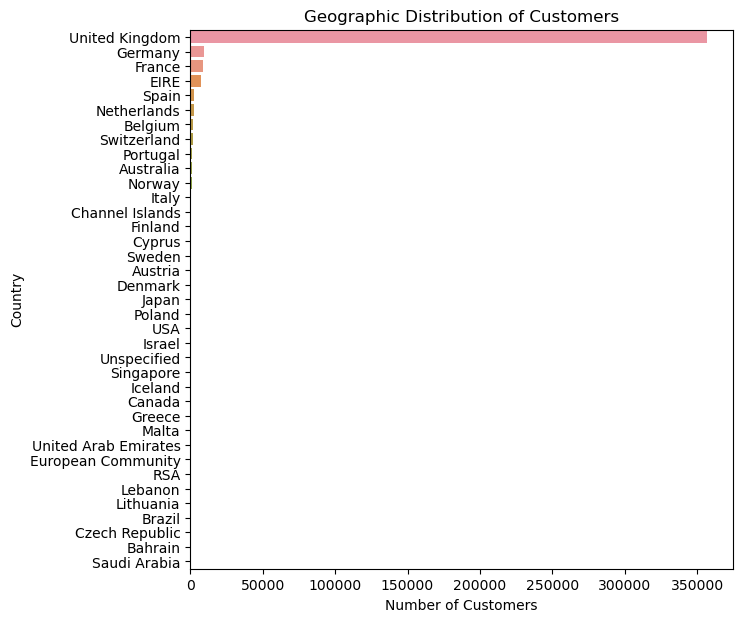

In [36]:
# Plotting the geographic distribution of customers
plt.figure(figsize=(7, 7))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Geographic Distribution of Customers')
plt.xlabel('Number of Customers')
plt.show()

Monthly Active Customers:

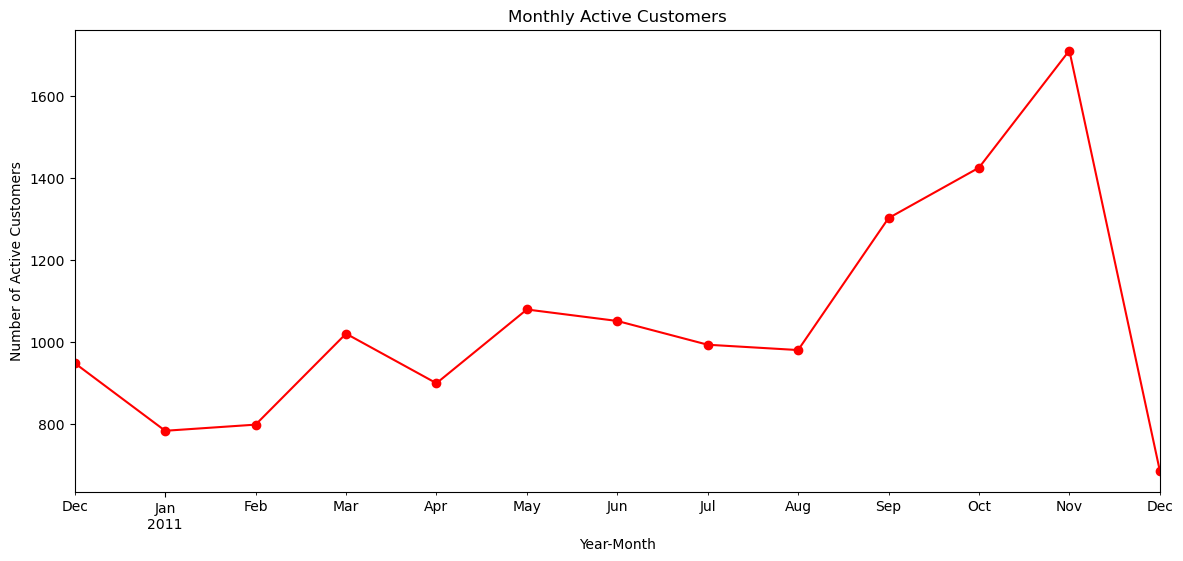

In [41]:
# Extract month and year from the InvoiceDate
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Count the number of active customers per month
monthly_active_customers = df.groupby('YearMonth')['CustomerID'].nunique()

# Plot monthly active customers
plt.figure(figsize=(14, 6))
monthly_active_customers.plot(kind='line', marker='o', color='red')
plt.title('Monthly Active Customers')
plt.xlabel('Year-Month')
plt.ylabel('Number of Active Customers')
plt.show()


Segmenting the customers based on their purchasing behavior.(k-means)

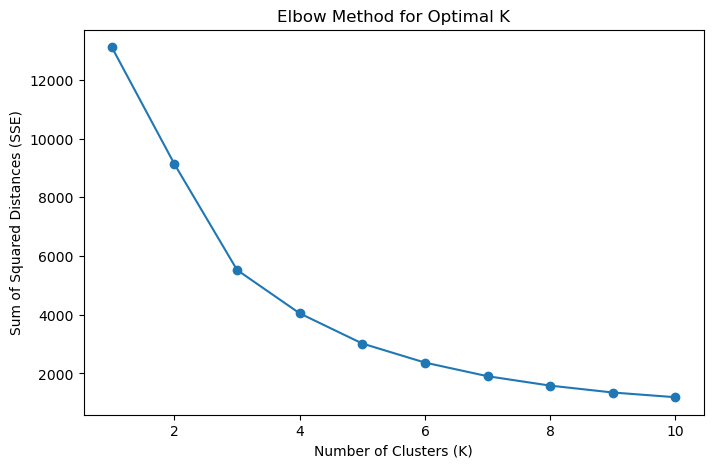

In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
cluster_data = rfm_data[['Recency', 'Frequency', 'Monetary']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()



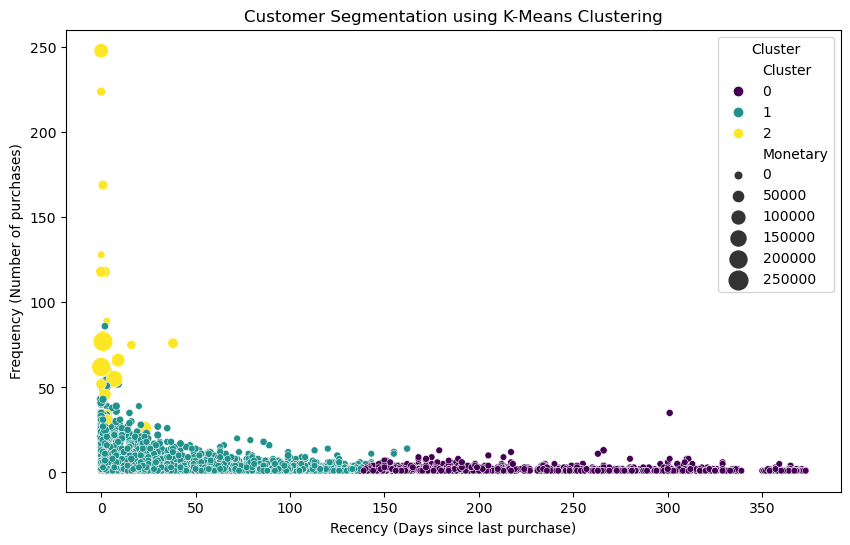


Cluster Counts:
0    1109
1    3240
2      23
Name: Cluster, dtype: int64


In [52]:
# Based on the Elbow Method, optimal_k = 3 
optimal_k = 3  

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=rfm_data, palette='viridis', size='Monetary', sizes=(20, 200))
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Frequency (Number of purchases)')
plt.legend(title='Cluster')
plt.show()

# Display the count of customers in each cluster
cluster_counts = rfm_data['Cluster'].value_counts().sort_index()
print("\nCluster Counts:")
print(cluster_counts)


In [54]:
# Calculate average recency, frequency, and monetary values for each cluster
cluster_analysis = rfm_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
}).rename(columns={'Recency': 'Average Recency', 'Frequency': 'Average Frequency', 'Monetary': 'Average Monetary'}).sort_index()

# Count the number of customers in each cluster
cluster_analysis['Customer Count'] = rfm_data['Cluster'].value_counts().sort_index()

# Display the cluster analysis results
print("\nCluster Analysis Results:")
print(cluster_analysis)



Cluster Analysis Results:
         Average Recency  Average Frequency  Average Monetary  Customer Count
Cluster                                                                      
0             244.994590           1.853922        458.796710            1109
1              38.963580           5.597531       1817.017066            3240
2               5.086957          86.869565      81851.242609              23


Cluster 0 (Loyal, Low-Spending Customers): These customers have a higher average recency (time since last purchase) compared to other clusters, make fewer purchases, and have a lower average monetary value. They might be less engaged or occasional shoppers.

Cluster 1 (Active, Moderate-Spending Customers): These customers have a moderate average recency, make more frequent purchases, and have a moderate average monetary value. They are engaged and contribute significantly to revenue.

Cluster 2 (Recent, High-Spending Customers): These customers have a very recent average recency, make a high number of purchases, and have a significantly higher average monetary value. They are recent, high-value customers who contribute substantially to revenue.

